In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install wandb
!wandb

     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 181 kB 49.1 MB/s 
     |████████████████████████████████| 145 kB 51.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=aafc2fdc4e43dde504af7eb4cd2541460b7808a48a16fb8ddb30a518b8b64602
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
Usage: wandb [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  agent         Run the W&B agent
  artifact      Commands for interacting with...
  controller    Run the W&B local sweep...
  disabled      Disable W&B.
  docker        W&B docker lets you run your...
  docker-run    Simple wrapper for `docker run`...
  enabled       Enable W&B.
  init          Configure a directory with...
  launch 

In [3]:
%pip install kaggle --upgrade
import os
fpath = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
if not os.path.isfile(fpath):
    os.mkdir(os.path.join(os.path.expanduser("~"), ".kaggle"))
    with open(fpath, "w") as f:
        f.write(input(f"input {fpath}"))
    !chmod 600 {fpath}

input /root/.kaggle/kaggle.json{"username":"asimlatif","key":"64996d8fae55582faafc40fab8033b76"}


In [4]:
if 'datasets' not in os.listdir(os.getcwd()):
    !kaggle datasets download alessiocorrado99/animals10
    !mkdir datasets
    !unzip animals10.zip -d datasets/animals10
    !rm animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: datasets/animals10/raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: datasets/animals10/raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: datasets/ani

In [5]:
import numpy as np
class Dataset:
    def __init__(self, BS, shuffle=True):
        self.BS = BS
        self.XIndex = list()
        self.y = list()
        for i, yi in enumerate(sample_n):
            for xi in range(yi):
                self.y.append(i)
                self.XIndex.append(xi)
        self.XIndex = np.array(self.XIndex)
        self.y = np.array(self.y)
        self.l = len(self.y)
        if shuffle:
            randl = list(range(self.l))
            np.random.shuffle(randl)
            self.XIndex = self.XIndex[randl]
            self.y = self.y[randl]
    def __len__(self):
        return int(np.ceil(self.l/self.BS))
    def __getitem__(self, key):
        start = key * self.BS
        assert start < self.l
        stop = start + self.BS
        if stop > self.l and start < self.l:
            stop = self.l
        return self.XIndex[start:stop], self.y[start:stop]
    def __iter__(self):
        for b in range(len(self)):
            start = b*self.BS
            X, y = self.XIndex[start:start+self.BS], self.y[start:start+self.BS]
            X_path = list()
            for xs, ys in zip(X, y):
                X_path.append(os.path.join(path,class_list[ys],data_paths[ys][xs]))
            X_path = np.array(X_path)
            X_Images = self.toMem(X_path)
            yield X_Images, y
    def toMem(self, X_path):
        from PIL import Image
        X_images = list()
        for img_path in X_path:
            im = Image.open(img_path)
            X_images.append(im)
        return X_images
        
'''
getdata = Dataset(BS=150)
for x_b, y_b in getdata:
    print(type(x_b[0]))
    # print(x_b, y_b, x_b.shape, y_b.shape)
'''

'\ngetdata = Dataset(BS=150)\nfor x_b, y_b in getdata:\n    print(type(x_b[0]))\n    # print(x_b, y_b, x_b.shape, y_b.shape)\n'

In [40]:
import torch
import os
# torch.manual_seed(17)
from torchvision import datasets, transforms
BS = 256
IM_HEIGHT = 425
IM_WIDTH = 600
transform = transforms.Compose([transforms.Resize([IM_HEIGHT, IM_WIDTH]), transforms.ToTensor()])
path = os.path.join(os.getcwd(), "datasets", "animals10", "raw-img")
dataset = datasets.ImageFolder(path, transform=transform)
td_len, vd_len = 0.95, 0.05
train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*td_len), int(len(dataset)*vd_len)+1])
train_set_loader = torch.utils.data.DataLoader(train_set, batch_size=BS, shuffle=True)
val_set_loader = torch.utils.data.DataLoader(val_set, batch_size=BS, shuffle=True)

torch.Size([256, 3, 425, 600]) torch.Size([3, 425, 600])
tensor([[0.9451, 0.9451, 0.9451,  ..., 0.9569, 0.9569, 0.9569],
        [0.9451, 0.9451, 0.9451,  ..., 0.9529, 0.9529, 0.9490],
        [0.9529, 0.9529, 0.9451,  ..., 0.9373, 0.9294, 0.9255],
        ...,
        [0.3804, 0.3804, 0.3804,  ..., 0.4431, 0.5098, 0.5412],
        [0.4353, 0.4353, 0.4471,  ..., 0.3843, 0.4863, 0.5373],
        [0.4471, 0.4510, 0.4627,  ..., 0.3725, 0.4824, 0.5373]])


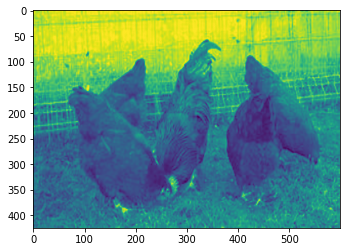

tensor([[0.7333, 0.7333, 0.7333,  ..., 0.7294, 0.7255, 0.7216],
        [0.7333, 0.7333, 0.7333,  ..., 0.7255, 0.7216, 0.7137],
        [0.7412, 0.7412, 0.7333,  ..., 0.7098, 0.6980, 0.6902],
        ...,
        [0.4078, 0.4039, 0.4039,  ..., 0.4863, 0.5529, 0.5843],
        [0.4627, 0.4627, 0.4745,  ..., 0.4314, 0.5333, 0.5843],
        [0.4745, 0.4784, 0.4902,  ..., 0.4196, 0.5294, 0.5843]])
tensor(0.)
tensor(0.9922)


In [41]:
import matplotlib.pyplot as plt
i, l = next(iter(train_set_loader))
print(i.shape, i[0].shape)
sample = i[0][2]
print(sample)
plt.imshow(i[0][2].reshape(IM_HEIGHT, IM_WIDTH))
plt.show()
print(i[0][0])
print(torch.min(i[0][0]))
print(torch.max(i[0][0]))

In [42]:
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
def preprocess(x, y):
    return x.to(dev), y.to(dev)
print(dev)

cuda


In [43]:
import torch.nn as nn
import torch.nn.functional as F
class someNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(IM_HEIGHT*IM_WIDTH*3, 100)
        self.l2 = nn.Linear(100, 10)
        nn.init.normal_(self.l1.weight, mean=0, std=0.1)
        nn.init.normal_(self.l2.weight, mean=0, std=0.1)
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.log_softmax(x)
        return x

model = someNet()
model.to(dev)

someNet(
  (l1): Linear(in_features=765000, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [44]:
WAN = True
N_EPOCH = 10
LR = 0.01

In [45]:
if WAN:
  import wandb
  wandb.init(project="animals10", entity="0xasim")
  wandb.config = {
    "learning_rate": LR,
    "epochs": N_EPOCH,
    "batch_size": BS
  }
  run_name = wandb.name()

train_loss,▁▆▇█▆▄▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▁
train_loss,2.25459
val_loss,0.79728


In [61]:
torch.cuda.empty_cache()

In [46]:
from tqdm import tqdm
loss_fn = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
review = lambda x_b: x_b.view(len(x_b), -1)
def getValLoss():
    with torch.no_grad():
        val_loss = torch.Tensor(len(val_set_loader)).cuda()
        for i, (x_v_b, y_v_b) in enumerate(tqdm(val_set_loader)):
            x_v_b, y_v_b = preprocess(x_v_b, y_v_b)
            x_v_b = review(x_v_b)
            pred = model.forward(x_v_b)
            loss = loss_fn(pred, y_v_b)
            val_loss[i] = (loss.sum()/y_v_b.shape[0])
            print(val_loss)
        return val_loss.sum().item()

def train():
    for i in (range(N_EPOCH)):
        batch_loss = list()
        for bI, (x_b, y_b) in enumerate(tqdm(train_set_loader)):
            x_b = review(x_b)
            x_b, y_b = preprocess(x_b, y_b)
            pred = model.forward(x_b)
            loss = loss_fn(pred, y_b)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backprop, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()
            batch_loss.append(loss.sum()/y_b.shape[0])
            if WAN:
                wandb.log({"train_loss": loss.sum().item()})
                if bI%50==0:
                    wandb.log({"val_loss": getValLoss()})

train()

  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  

 17%|█▋        | 1/6 [00:03<00:15,  3.01s/it]

tensor([18.7107,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000], device='cuda:0')



 33%|███▎      | 2/6 [00:05<00:11,  2.92s/it]

tensor([18.7107, 19.2643,  0.0000,  0.0000,  0.0000,  0.0000], device='cuda:0')



 50%|█████     | 3/6 [00:08<00:08,  2.71s/it]

tensor([18.7107, 19.2643, 19.6077,  0.0000,  0.0000,  0.0000], device='cuda:0')



 67%|██████▋   | 4/6 [00:10<00:05,  2.69s/it]

tensor([18.7107, 19.2643, 19.6077, 18.5156,  0.0000,  0.0000], device='cuda:0')



 83%|████████▎ | 5/6 [00:13<00:02,  2.64s/it]

tensor([18.7107, 19.2643, 19.6077, 18.5156, 22.1344,  0.0000], device='cuda:0')



  1%|          | 1/98 [00:16<26:29, 16.39s/it]

tensor([ 18.7107,  19.2643,  19.6077,  18.5156,  22.1344, 208.8842],
       device='cuda:0')


 17%|█▋        | 1/6 [00:02<00:12,  2.43s/it]

tensor([0.0089, 0.0000, 0.0000, 0.0000,    nan, 0.0000], device='cuda:0')



 33%|███▎      | 2/6 [00:04<00:09,  2.28s/it]

tensor([0.0089, 0.0088, 0.0000, 0.0000,    nan, 0.0000], device='cuda:0')



 50%|█████     | 3/6 [00:06<00:06,  2.23s/it]

tensor([0.0089, 0.0088, 0.0088, 0.0000,    nan, 0.0000], device='cuda:0')



 67%|██████▋   | 4/6 [00:09<00:04,  2.45s/it]

tensor([0.0089, 0.0088, 0.0088, 0.0088,    nan, 0.0000], device='cuda:0')



 83%|████████▎ | 5/6 [00:12<00:02,  2.48s/it]

tensor([0.0089, 0.0088, 0.0088, 0.0088, 0.0113, 0.0000], device='cuda:0')



 52%|█████▏    | 51/98 [02:35<04:48,  6.14s/it]

tensor([0.0089, 0.0088, 0.0088, 0.0088, 0.0113, 0.0790], device='cuda:0')


 17%|█▋        | 1/6 [00:02<00:11,  2.23s/it]

tensor([0.0087, 0.0000, 0.0000, 0.0000,    nan, 0.0000], device='cuda:0')



 33%|███▎      | 2/6 [00:04<00:08,  2.24s/it]

tensor([0.0087, 0.0087, 0.0000, 0.0000,    nan, 0.0000], device='cuda:0')



 50%|█████     | 3/6 [00:06<00:06,  2.21s/it]

tensor([0.0087, 0.0087, 0.0088, 0.0000,    nan, 0.0000], device='cuda:0')



 67%|██████▋   | 4/6 [00:09<00:04,  2.29s/it]

tensor([0.0087, 0.0087, 0.0088, 0.0087,    nan, 0.0000], device='cuda:0')



 83%|████████▎ | 5/6 [00:12<00:02,  2.60s/it]

tensor([0.0087, 0.0087, 0.0088, 0.0087, 0.0087, 0.0000], device='cuda:0')



  1%|          | 1/98 [00:14<24:08, 14.94s/it]

tensor([0.0087, 0.0087, 0.0088, 0.0087, 0.0087, 0.0770], device='cuda:0')


 13%|█▎        | 13/98 [00:44<04:51,  3.43s/it]


KeyboardInterrupt: ignored

In [55]:
run_name = "true-deluge-17"
model_name = run_name+'.pt'
MODEL_PATH = os.path.join(os.getcwd(), str(N_EPOCH))
torch.save(model.state_dict(), model_name)
print(model_name)
!ls -lah {model_name}

true-deluge-17.pt
-rw-r--r-- 1 root root 292M May 16 10:49 true-deluge-17.pt


In [56]:
INCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False
DOWNLOAD = True
if INCOLAB and DOWNLOAD:
    from google.colab import files
    files.download(model_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
!nvidia-smi
!lscpu
!cat /proc/meminfo

Mon May 16 11:05:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   5824MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------